In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/train.csv
/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/summeranalytics2020/train.csv',index_col = 'Id')
sample_df = pd.read_csv('/kaggle/input/summeranalytics2020/Sample_submission.csv',index_col = 'Id')
test_df = pd.read_csv('/kaggle/input/summeranalytics2020/test.csv',index_col = 'Id')

In [3]:
train_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [4]:
Att = train_df.Attrition

In [5]:
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [6]:
train_df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


# **Data Wrangling**

In [7]:
train_df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

Since we have object columns in the data and our ML algorithms dont work on object columns so converting all of them to integer.

In [8]:
list1 = train_df.select_dtypes(include = object).columns.tolist()
train_dummy = pd.get_dummies(train_df,columns = list1,prefix = list1,drop_first = True)
test_dummy = pd.get_dummies(test_df,columns = list1,prefix = list1,drop_first = True)
#new_train=

In [9]:
train_dummy.shape

(1628, 42)

In [10]:
train_dummy.dtypes

Age                                  int64
Attrition                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
CommunicationSkill                   int64
Behaviour                            int64
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_

In [11]:
train_dummy.isnull().sum()

Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
CommunicationSkill                   0
Behaviour                            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Scien

Clearly enough we dont have any null values in the dataset.
Further now, lets check for noise in the data.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

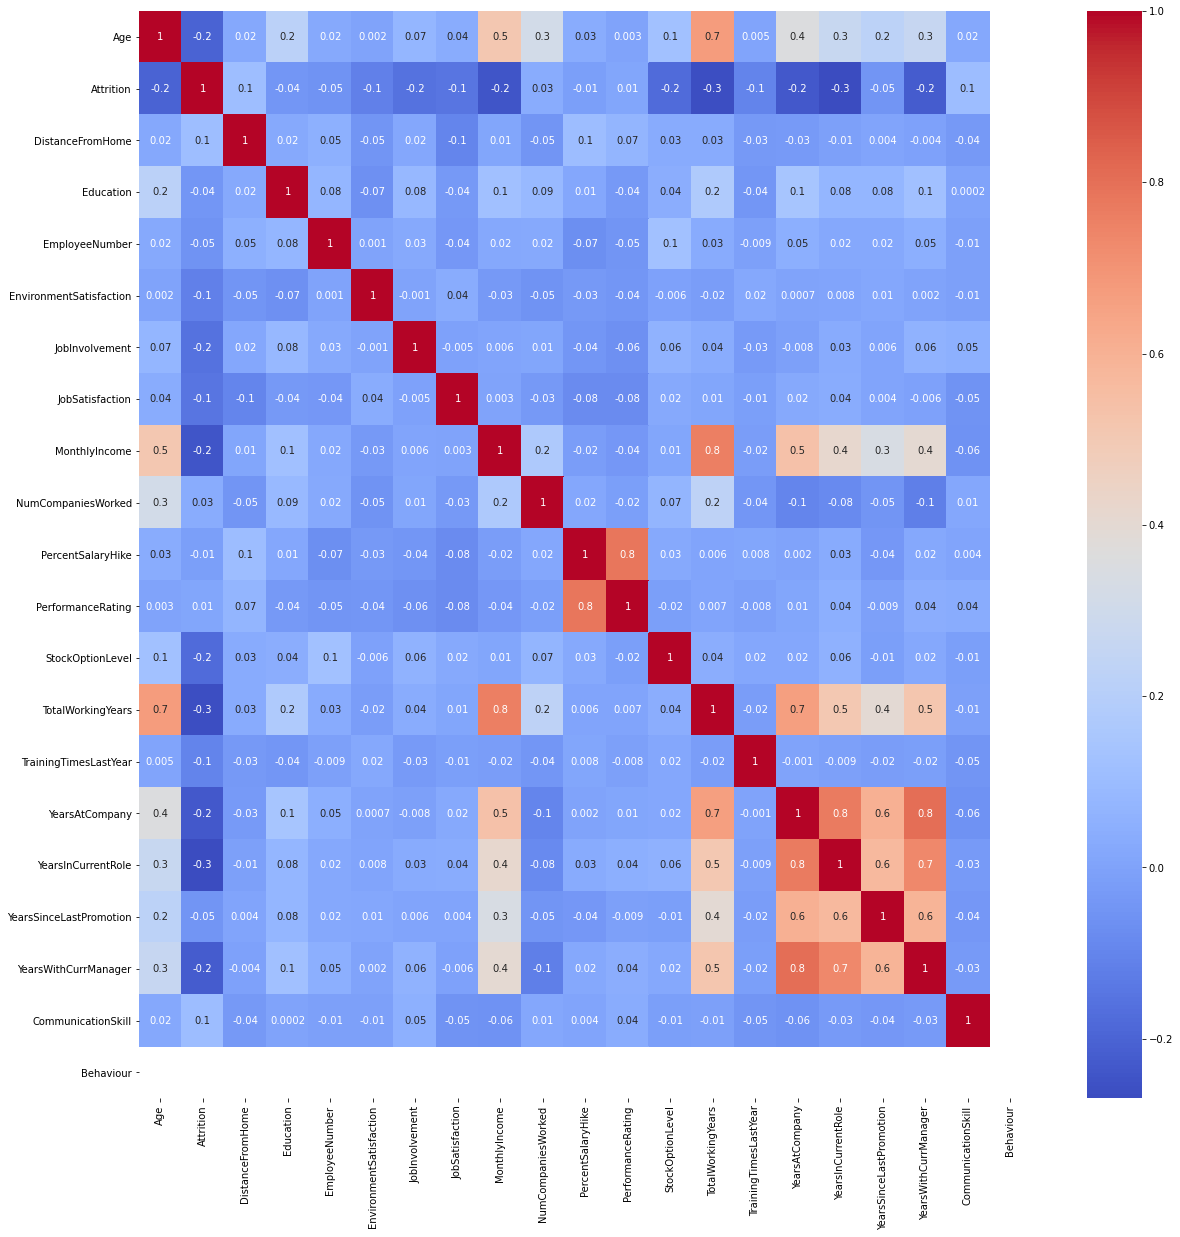

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(train_df.corr(),annot = True,fmt ='.1g',cmap = 'coolwarm')

From the above plot we can clearly observe that the features like Years in current role,years since last promotion ,years at the company etc.have good correlation numbers and hence are highly correlated.

In [14]:
df_object = train_df[train_df.select_dtypes(object).columns]
df_object.shape

(1628, 7)

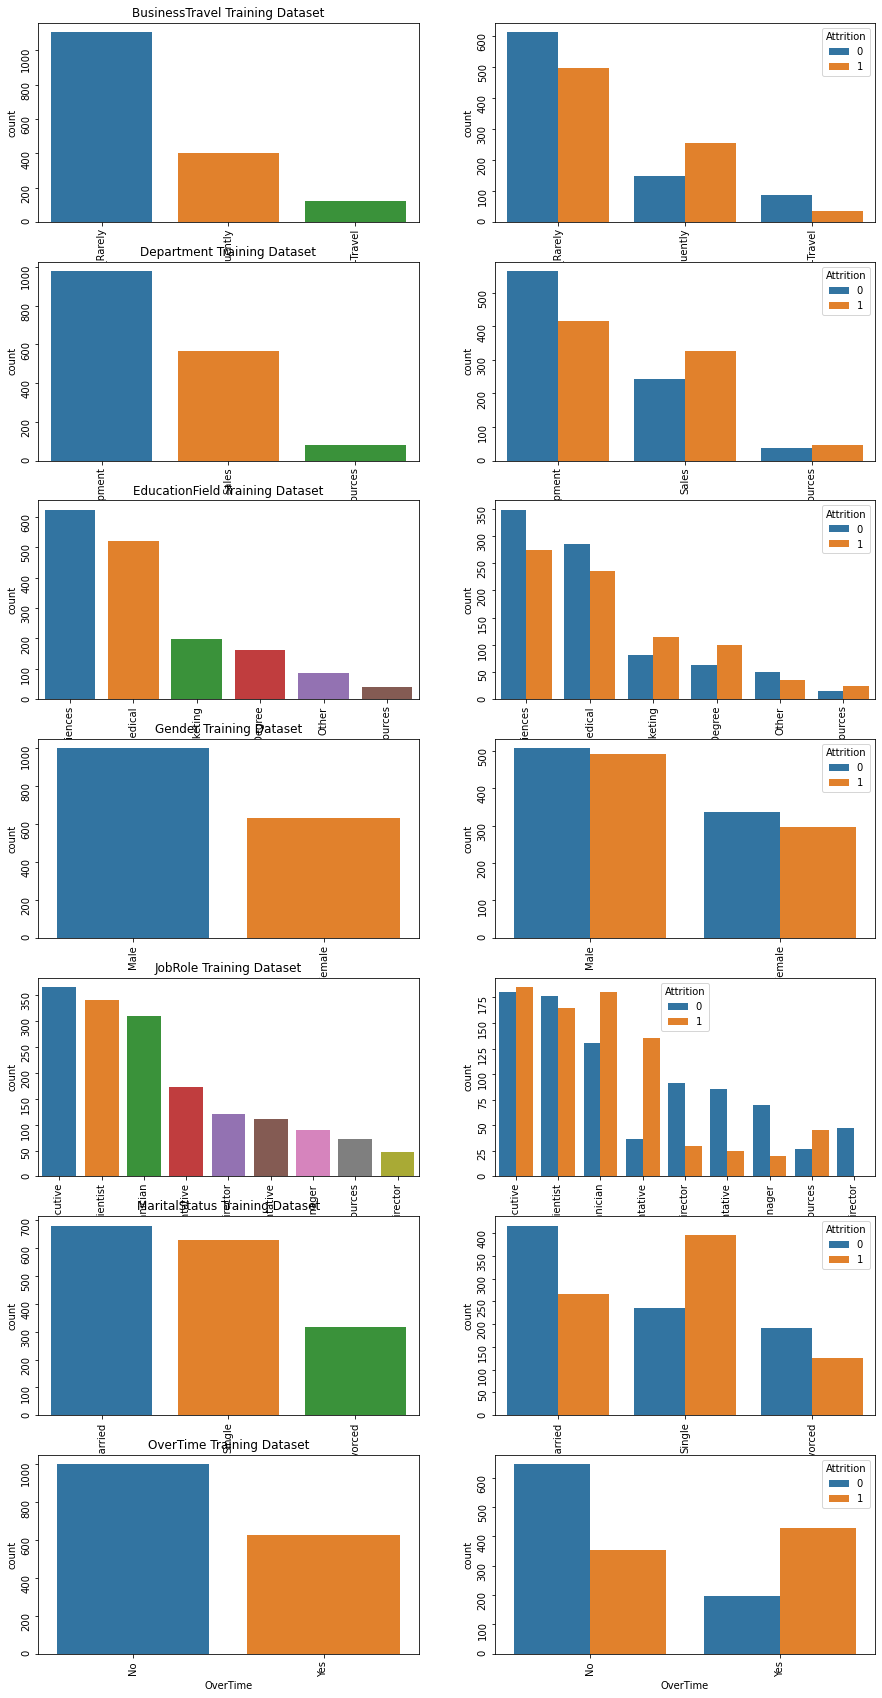

In [15]:
fig, ax = plt.subplots(7,2,figsize = (15,30))
for i in np.arange(7):
    s = df_object.iloc[:,i]
    sns.countplot(s, ax = ax[i,0], order = s.value_counts().index.tolist())
    ax[i,0].set_title(df_object.columns[i]+' Training Dataset')
    ax[i,0].tick_params(labelrotation=90)
    sns.countplot(s, ax = ax[i,1], order = s.value_counts().index.tolist(), hue=Att)
    ax[i,1].tick_params(labelrotation=90)
    

In [16]:
df_int = train_df[train_df.select_dtypes(int).columns]
df_int.shape

(1628, 21)

Now we go through some columns and analyse if there is any noise present in the dataset.

In [17]:
df_int.nunique()

Age                          43
Attrition                     2
DistanceFromHome             29
Education                     5
EmployeeNumber             1000
EnvironmentSatisfaction       4
JobInvolvement                4
JobSatisfaction               4
MonthlyIncome               941
NumCompaniesWorked           10
PercentSalaryHike            15
PerformanceRating             2
StockOptionLevel              4
TotalWorkingYears            39
TrainingTimesLastYear         7
YearsAtCompany               36
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
CommunicationSkill            5
Behaviour                     1
dtype: int64

A few things really odd in this dataset are

1.There are only 1000 unique employee numbers whereas the total number we have is 1628.

2.The column performance rating has only 2 unique entries which is strange because usually the rating columns have atleast 4+ entries.

3.The column Behavious has only 1 unique entry, this implies that is a useless column.

In [18]:
train_df.duplicated().sum(),test_df.duplicated().sum()

(628, 0)

Clearly we observe that there are 628 duplicated columns in the dataset.

In [19]:
train_df.drop_duplicates(inplace = True)

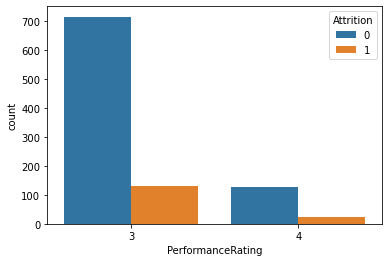

In [20]:
sns.countplot(x = 'PerformanceRating',hue = 'Attrition',data = train_df)

In [21]:
train_df.PerformanceRating.describe()

count    1000.000000
mean        3.153000
std         0.360168
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [22]:
train_df.PerformanceRating.value_counts()

3    847
4    153
Name: PerformanceRating, dtype: int64

The PerformanceRating column is clearly just noise in the data

Hence removing both PerformanceRating and behaviour columns.

In [23]:
train_df.drop(['Behaviour','PerformanceRating'],axis = 1,inplace = True)
test_df.drop(['Behaviour','PerformanceRating'],axis = 1,inplace = True)

In [24]:
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'CommunicationSkill'],
      dtype='object')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train_df.Age.unique()

array([30, 36, 55, 39, 37, 31, 32, 33, 35, 21, 60, 29, 40, 34, 41, 38, 45,
       44, 26, 54, 23, 50, 46, 42, 43, 28, 25, 47, 51, 48, 49, 27, 59, 58,
       53, 57, 52, 24, 20, 18, 19, 56, 22])

In [27]:
train_df['age_bins'] = pd.cut(x=train_df['Age'], bins=[18,20,29,39,49,60],labels=['Teens','20s','30s','40s','50s'])
test_df['age_bins'] = pd.cut(x=test_df['Age'], bins=[18,20,29,39,49,60],labels=['Teens','20s','30s','40s','50s'])


In [28]:
age = train_df.groupby('age_bins')
age.groups.keys()

dict_keys(['Teens', '20s', '30s', '40s', '50s'])

In [29]:
train_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,age_bins
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,14,0,12,2,11,7,6,7,4,30s
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,12,2,7,2,3,2,1,1,2,30s
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,16,0,12,3,9,7,7,3,5,50s
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,13,0,18,2,7,7,1,7,4,30s
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,15,1,10,2,10,7,7,8,1,30s


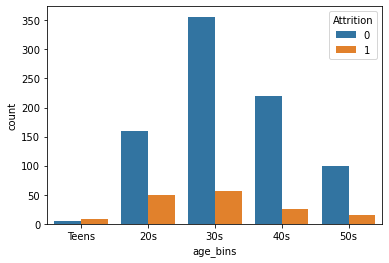

In [30]:
sns.countplot(x = 'age_bins',hue = 'Attrition',data = train_df)

In [31]:
train_df.YearsAtCompany.unique()

array([11,  3,  9,  7, 10,  5,  1, 18,  6,  2, 15, 12,  8, 13, 27,  4,  0,
       16, 14, 19, 20, 22, 21, 26, 17, 24, 36, 29, 33, 34, 37, 25, 23, 31,
       32, 30])

In [32]:
train_df['years_in_company'] = pd.cut(x=train_df['YearsAtCompany'], bins=[0,5,10,15,20,25,30,37],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35'])
test_df['years_in_company'] = pd.cut(x=test_df['YearsAtCompany'], bins=[0,5,10,15,20,25,30,37],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35'])

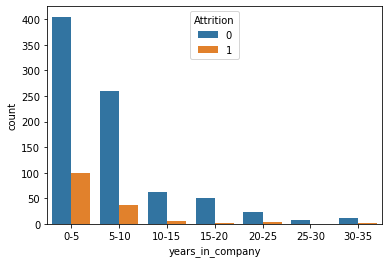

In [33]:
sns.countplot(x = 'years_in_company',hue = 'Attrition',data = train_df)

In [34]:
train_df.TotalWorkingYears.unique()

array([12,  7, 18, 10, 13,  4,  8,  5,  1, 22,  3, 16, 17,  6,  9, 11, 23,
       15, 14, 29, 32,  2, 20, 30, 21, 37, 33, 27, 26, 24, 19, 28,  0, 25,
       31, 36, 35, 34, 38])

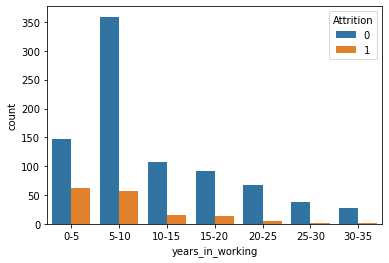

In [35]:
train_df['years_in_working'] = pd.cut(x=train_df['TotalWorkingYears'], bins=[0,5,10,15,20,25,30,39],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35'])
test_df['years_in_working'] = pd.cut(x=test_df['TotalWorkingYears'], bins=[0,5,10,15,20,25,30,39],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35'])
sns.countplot(x = 'years_in_working',hue = 'Attrition',data = train_df)
#TotalWorkingYears',
#       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',

In [36]:
train_df.shape,test_df.columns

((1000, 29),
 Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
        'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
        'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'CommunicationSkill', 'age_bins',
        'years_in_company', 'years_in_working'],
       dtype='object'))

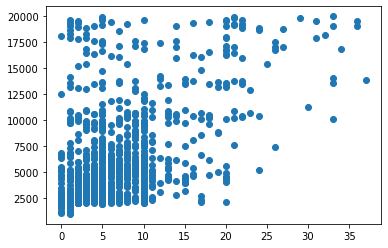

In [37]:
plt.scatter(x= train_df.YearsAtCompany,y = train_df.MonthlyIncome)

# **Trying different models**

# ** By one hot encoding **

In [38]:
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'CommunicationSkill', 'age_bins',
       'years_in_company', 'years_in_working'],
      dtype='object')

In [39]:
train_df.dtypes

Age                           int64
Attrition                     int64
BusinessTravel               object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
CommunicationSkill            int64
age_bins                   category
years_in_company           c

In [40]:
#now since we already have bins for 3 categories lets remove them
new_train = train_df.drop(['Age','YearsAtCompany','TotalWorkingYears'],axis =1,inplace = True)
new_test = test_df.drop(['Age','YearsAtCompany','TotalWorkingYears'],axis =1,inplace = True)

In [41]:
#new_train.dtypes
#new_train = train_df

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score


In [43]:
train_df.dtypes
list1 = train_df.select_dtypes(include = object).columns.tolist()
train_dummy1 = pd.get_dummies(train_df,columns = list1,prefix = list1,drop_first = True)
list2 = train_dummy1.select_dtypes(include = 'category').columns.tolist()
train_dummy2 = pd.get_dummies(train_dummy1,columns = list2,prefix = list2,drop_first = True)
list3 = test_df.select_dtypes(include = object).columns.tolist()
test_dummy1 = pd.get_dummies(test_df,columns = list3,prefix = list3,drop_first = True)
list4 = test_dummy1.select_dtypes(include = 'category').columns.tolist()
test_dummy2 = pd.get_dummies(test_dummy1,columns = list4,prefix = list4,drop_first = True)

In [44]:
Y = train_dummy2.Attrition
X = train_dummy2.drop(['Attrition'],axis = 1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2)

In [45]:
train_dummy2.shape,test_dummy2.shape

((1000, 53), (470, 52))

In [46]:
train_dummy2.dtypes

Attrition                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
StockOptionLevel                     int64
TrainingTimesLastYear                int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
CommunicationSkill                   int64
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
EducationField_Life Sciences         uint8
EducationField_Marketing             uint8
EducationField_Medical               uint8
EducationFi

In [47]:
from sklearn.ensemble import RandomForestClassifier
onemodel1 = RandomForestClassifier(n_estimators=400,n_jobs = -1,min_samples_leaf=10)
onemodel1.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [48]:
onemodel1.score(x_test,y_test)

NameError: name 'x_test' is not defined

In [49]:
cross_val_score(onemodel1,x_train,y_train,cv = 5,n_jobs = -1,verbose = 1,scoring = 'roc_auc').mean()

NameError: name 'x_train' is not defined

In [50]:
onemodel2 = RandomForestClassifier(n_estimators=400,n_jobs = -1,min_samples_leaf=10)
onemodel2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [51]:
cross_val_score(onemodel2,X_train,Y_train,cv = 5,n_jobs = -1,verbose = 1,scoring = 'roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


0.7912296296296295

In [52]:
onemodel2.score(X_test,Y_test)

0.84

In [53]:
onemodel2.predict_proba(test_dummy2)

array([[0.8943867 , 0.1056133 ],
       [0.93312498, 0.06687502],
       [0.87356453, 0.12643547],
       [0.90493313, 0.09506687],
       [0.93508571, 0.06491429],
       [0.92379913, 0.07620087],
       [0.68489942, 0.31510058],
       [0.83900879, 0.16099121],
       [0.80263102, 0.19736898],
       [0.92781868, 0.07218132],
       [0.92847901, 0.07152099],
       [0.86355294, 0.13644706],
       [0.87766137, 0.12233863],
       [0.95384064, 0.04615936],
       [0.92689952, 0.07310048],
       [0.88714484, 0.11285516],
       [0.80341386, 0.19658614],
       [0.90059761, 0.09940239],
       [0.88332257, 0.11667743],
       [0.98149086, 0.01850914],
       [0.92736572, 0.07263428],
       [0.68277409, 0.31722591],
       [0.87788069, 0.12211931],
       [0.89741464, 0.10258536],
       [0.88718062, 0.11281938],
       [0.96608636, 0.03391364],
       [0.94781225, 0.05218775],
       [0.9359617 , 0.0640383 ],
       [0.51249662, 0.48750338],
       [0.9216738 , 0.0783262 ],
       [0.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

onemodel5 = LGBMClassifier(random_state=7, n_estimators=100, colsample_bytree=0.5, 
                       max_depth=2, learning_rate=0.1, boosting_type='gbdt')
cross_val_score(onemodel5, X_train, Y_train, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


0.789688888888889

In [55]:
X_train.shape,test_dummy2.shape

((800, 52), (470, 52))

In [56]:
onemodel5.fit(X_train,Y_train)
onemodel5.predict_proba(test_dummy2)

array([[0.91729243, 0.08270757],
       [0.96245202, 0.03754798],
       [0.93075659, 0.06924341],
       [0.92789224, 0.07210776],
       [0.9632182 , 0.0367818 ],
       [0.90974423, 0.09025577],
       [0.77457631, 0.22542369],
       [0.88062905, 0.11937095],
       [0.91298193, 0.08701807],
       [0.93952517, 0.06047483],
       [0.97563688, 0.02436312],
       [0.90055083, 0.09944917],
       [0.94121928, 0.05878072],
       [0.95889355, 0.04110645],
       [0.92893226, 0.07106774],
       [0.91228399, 0.08771601],
       [0.75372889, 0.24627111],
       [0.94056817, 0.05943183],
       [0.87628411, 0.12371589],
       [0.98619479, 0.01380521],
       [0.9709723 , 0.0290277 ],
       [0.22109912, 0.77890088],
       [0.9750064 , 0.0249936 ],
       [0.95161931, 0.04838069],
       [0.84246548, 0.15753452],
       [0.98498654, 0.01501346],
       [0.97484517, 0.02515483],
       [0.95690422, 0.04309578],
       [0.19031553, 0.80968447],
       [0.94743381, 0.05256619],
       [0.

In [57]:
onemodel4 = XGBClassifier(seed=7, n_jobs=-1, n_estimators=100, random_state=7, max_depth=2, learning_rate=0.1)
cross_val_score(onemodel4, X_train, Y_train, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


0.7783111111111111

In [58]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('onemodel4', onemodel4), ('onemodel5', onemodel5),('onemodel2', onemodel2)],
                                         voting='soft', n_jobs=-1)
cross_val_score(ensemble, X, Y, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


0.8311345298880193

In [59]:
ensemble.fit(X, Y)
y_pred = ensemble.predict_proba(test_dummy2)[:, 1]
sub_df = pd.DataFrame({"Id":test_dummy2.index, "Attrition": y_pred})
sub_df.to_csv("SA_submission_1.csv", index=False)

# **Model without binning**

In [60]:
train_df.dtypes

Attrition                     int64
BusinessTravel               object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
StockOptionLevel              int64
TrainingTimesLastYear         int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
CommunicationSkill            int64
age_bins                   category
years_in_company           category
years_in_working           category
dtype: object

In [61]:
train_dummy.dtypes

Age                                  int64
Attrition                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
CommunicationSkill                   int64
Behaviour                            int64
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_

In [62]:
train_dummy.drop(['Behaviour','PerformanceRating'],axis = 1,inplace = True)
test_dummy.drop(['Behaviour','PerformanceRating'],axis = 1,inplace = True)

In [63]:
train_dummy.drop_duplicates(inplace = True)

In [64]:
Y = train_dummy.Attrition
X = train_dummy.drop(['Attrition'],axis = 1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2)
onemodel6 = RandomForestClassifier(n_estimators=400,n_jobs = -1,min_samples_leaf=10)
onemodel6.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [65]:
#for submission
cross_val_score(onemodel6,X_train,Y_train,cv = 5,n_jobs = -1,verbose = 1,scoring = 'roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


0.8210219500786664

In [66]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(random_state=7, n_estimators=100, colsample_bytree=0.5, 
                       max_depth=2, learning_rate=0.1, boosting_type='gbdt')
cross_val_score(lgbmc, X_train, Y_train, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.8376138623123698

In [67]:
xgbc = XGBClassifier(seed=7, n_jobs=-1, n_estimators=100, random_state=7, max_depth=2, learning_rate=0.1)
cross_val_score(xgbc, X_train, Y_train, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


0.83824353446443

In [68]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('onemodel6', onemodel6), ('xgbc', xgbc), ('lgbmc', lgbmc)],
                                         voting='soft', n_jobs=-1)
cross_val_score(ensemble, X, Y, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


0.8285335160858578

In [69]:
ensemble.fit(X, Y)
y_pred = ensemble.predict_proba(test_dummy)[:, 1]
sub_df = pd.DataFrame({"Id":test_dummy.index, "Attrition": y_pred})
sub_df.to_csv("SA_submission_2.csv", index=False)